In [1]:
# import packages 

import numpy as np 
import pandas as pd 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score,  ConfusionMatrixDisplay 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
# import Iris data 

iris = datasets.load_iris() 
print(iris.feature_names) 
print(iris.target_names) 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
#create dataframe 

df = pd.DataFrame(iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) 
df['target'] = iris.target 
df.head() 

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# check missing values 

df.isna().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [5]:
# create train and test data 

X = df.drop('target', axis=1) 
y = df['target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =1) 

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

# fit the model using sklearn 
model_qda = QuadraticDiscriminantAnalysis(store_covariance=True) 
model_qda.fit(X_train, y_train) 
y_hat_qda = model_qda.predict(X_test) 
pred_qda = list(map(round, y_hat_qda)) 

Test accuracy =  1.0


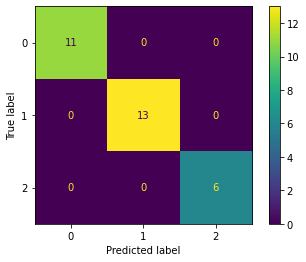

In [7]:
# confusion matrix 
cm_stat = confusion_matrix(y_test, pred_qda)  
ConfusionMatrixDisplay(cm_stat).plot() 
# Accuracy 
print('Test accuracy = ', accuracy_score(y_test, pred_qda)) 

In [8]:
df1 = df[["sepal_length", "sepal_width", "target"]]
df1.head()

,sepal_length,sepal_width,target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


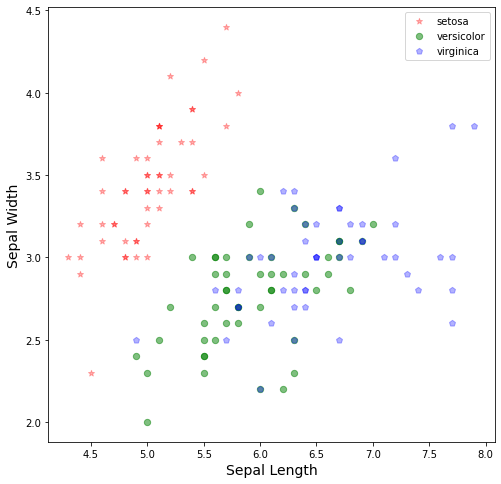

In [9]:


FIGSIZE = (8,8)
Xax= np.array(df1["sepal_length"])
Yax= np.array(df1["sepal_width"])
labels= np.array(df1["target"])
cdict={0:'red',1:'green', 2 :'blue'}
labl={0:'setosa',1:'versicolor', 2: 'virginica'}
marker={0:'*',1:'o', 2:'p'}
alpha={0:.3, 1:.5, 2:.3}
fig,ax=plt.subplots(figsize=FIGSIZE)
fig.patch.set_facecolor('white')
for l in np.unique(labels):
   ix=np.where(labels==l)
   ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,label=labl[l],marker=marker[l],alpha=alpha[l])

plt.xlabel("Sepal Length",fontsize=14)
plt.ylabel("Sepal Width",fontsize=14)
plt.legend()
plt.show()

In [10]:
df1['sepal_length'].min(), df1['sepal_length'].max()

(4.3, 7.9)

In [11]:
df1['sepal_width'].min(), df1['sepal_width'].max()

(2.0, 4.4)

In [12]:
df['species'] = df['target'] 
df['species'] = df['species'].apply(lambda x: 'setosa' if x==0 else('versicolor' if x==1 else 'virginica')) 
 
X = df.drop(['target','species'], axis=1) 
y = df['target'] 
 
model_qda = QuadraticDiscriminantAnalysis(store_covariance=True) 
model_qda.fit(X,y) 

QuadraticDiscriminantAnalysis(store_covariance=True)

In [13]:
df1['species'] = df1['target']
df1['species'] = df1['species'].apply(lambda x: 'setosa' if x==0 else('versicolor' if x==1 else 'virginica'))

In [14]:
df1['species'] = df1['target'] 
df1['species'] = df1['species'].apply(lambda x: 'setosa' if x==0 else('versicolor' if x==1 else 'virginica')) 
 
X = df1.drop(['target','species'], axis=1) 
y = df1['target'] 
 
model_qda = QuadraticDiscriminantAnalysis(store_covariance=True) 
model_qda.fit(X,y) 

QuadraticDiscriminantAnalysis(store_covariance=True)

In [15]:
sepal_length = np.linspace(4, 8, 500)
sepal_width = np.linspace(1.5, 4.5, 500)
sepal_length,sepal_width  = np.meshgrid(sepal_length, sepal_width)
prediction = np.array([model_qda.predict( np.array([[x,y]])) for x,y in zip(np.ravel(sepal_length), np.ravel(sepal_width)) ]).reshape(sepal_length.shape)


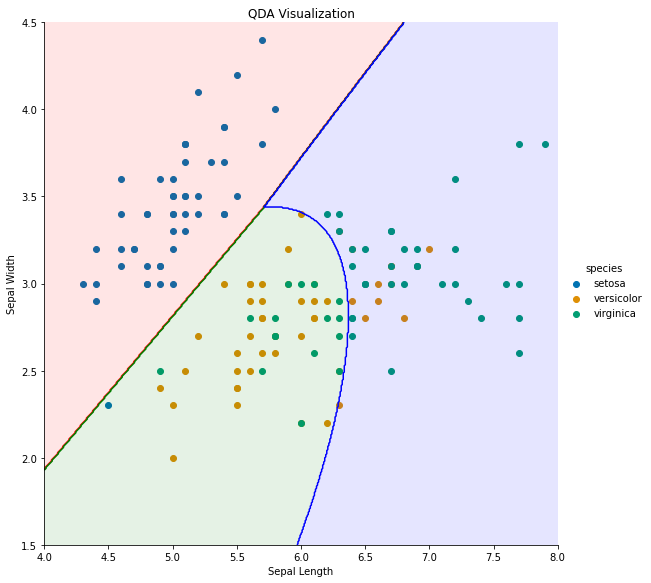

In [16]:
fig = sns.FacetGrid(df1, hue="species", size=8, palette = 'colorblind').map(plt.scatter, "sepal_length", "sepal_width").add_legend()
figax = fig.ax
figax.contourf(sepal_length,sepal_width, prediction, 2, alpha = .1, colors = ('red','green','blue'))
figax.contour(sepal_length,sepal_width, prediction, 2, alpha = 1, colors = ('red','green','blue'))

figax.set_xlabel('Sepal Length')
figax.set_ylabel('Sepal Width')
figax.set_title('QDA Visualization')

plt.show()